In [87]:
import matplotlib.pyplot as plt
from metpy.plots import USCOUNTIES
import geopandas
from cartopy import crs as ccrs
from cartopy.io.img_tiles import GoogleTiles, OSM, Stamen
import cartopy.feature as cfeature
from shapely.geometry import shape, Polygon
import itertools

In [2]:
# Read in Shapefile
cat_gdf = geopandas.read_file('z_30mr21/z_30mr21.shp')

In [102]:
counties = ["FLZ050","FLZ151", "FLZ155", "FLZ160", "FLZ162","FLZ165"]
counties = [county.replace('Z', '') for county in counties]

In [103]:
def calculate_bounds(counties): 
    latitudes = []
    longitudes = []
    
    for ugc in counties:
        latitude = (cat_gdf[cat_gdf['STATE_ZONE'] == ugc]['LAT']).tolist()
        longitude = (cat_gdf[cat_gdf['STATE_ZONE'] == ugc]['LON']).tolist()
        latitudes.append(latitude)
        longitudes.append(longitude)
        
    flatten = itertools.chain.from_iterable
    latitudes = list(flatten(latitudes))
    longitudes = list(flatten(longitudes))
    
    return {
        'west_bound': min(longitudes),
        'south_bound': min(latitudes),
        'east_bound': max(longitudes),
        'north_bound': max(latitudes),
    }

bounds = calc_bounds(counties)

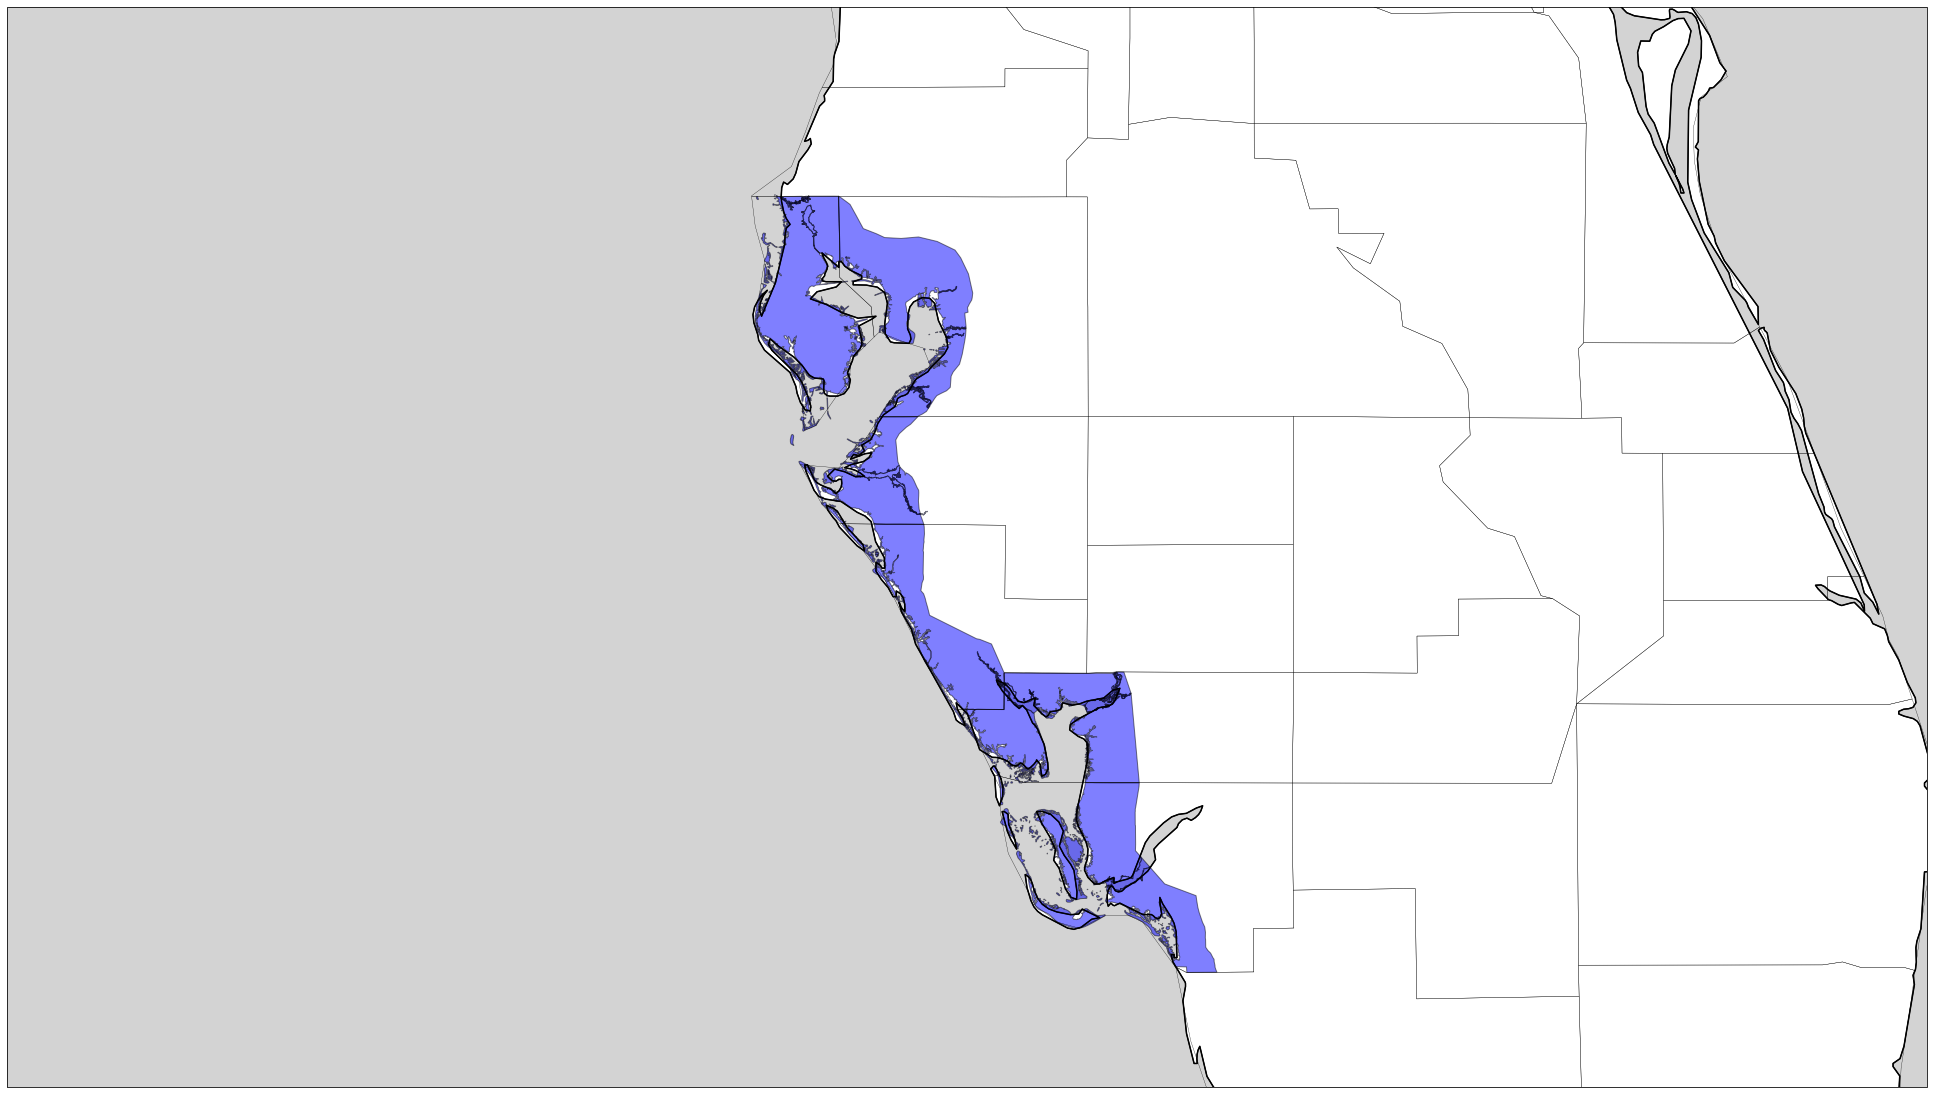

In [104]:
# Setup matplotlib figure
fig = plt.figure(figsize=(1920/72, 1080/72))
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.PlateCarree())

ax.set_extent([bounds['west_bound'] - 0.5, bounds['east_bound'] + 0.5, 
               bounds['south_bound'] - 0.5, bounds['north_bound'] + 0.5], 
              ccrs.PlateCarree())
ax.set_adjustable('datalim')

# Setup borders (states, countries, coastlines, etc)
ax.add_feature(cfeature.COASTLINE.with_scale('10m'))
ax.add_feature(cfeature.OCEAN.with_scale('10m'), color='lightgray')
ax.add_feature(USCOUNTIES.with_scale('20m'), edgecolor='black', zorder=5, linewidth=0.3)
ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=1.5, zorder=10)

for ugc in counties:
    ax.add_geometries(cat_gdf[cat_gdf['STATE_ZONE'] == ugc]['geometry'], crs=ccrs.PlateCarree(), 
                      facecolor='blue', 
                      edgecolor='black', alpha=0.5)